# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Lisa Nuri Amelia
- **Email:** lisanuriamelia@gmail.com
- **ID Dicoding:** lisanuriamelia

## Menentukan Pertanyaan Bisnis

1. Apakah ada perbedaan penggunaan sepeda antara akhir pekan dan hari kerja?
2.Bagaimana tren penggunaan sepeda setiap bulan sepanjang tahun?
3. Bagaimana pengaruh cuaca buruk terhadap penggunaan sepeda?
4. Apakah terdapat pola penggunaan sepeda berdasarkan cuaca ekstrem (kelembaban tinggi dan kecepatan angin tinggi)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#pip install numpy pandas scipy matplotlib seaborn jupyter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

In [ ]:
# Gathering Data: Memuat dataset
day_data = pd.read_csv('https://raw.githubusercontent.com/lisaamel07/proyek_analisis_data/main/day.csv')
hour_data = pd.read_csv('https://raw.githubusercontent.com/lisaamel07/proyek_analisis_data/main/hour.csv')

### Display initial data

In [ ]:
day_data.head(), hour_data.head()

# Checking data types and missing values
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Checking data types and missing values

### Checking missing values

In [ ]:
# Checking for missing values
day_data.isnull().sum(), hour_data.isnull().sum()

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

### Checking duplicates

In [ ]:
# Checking for duplicates in the data
day_data.duplicated().sum(), hour_data.duplicated().sum()

(0, 0)

### Descriptive statistics

In [ ]:
# Basic descriptive statistics for both datasets
day_data.describe(), hour_data.describe()

(          instant      season          yr        mnth     holiday     weekday  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
 std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
 min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
 25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
 50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
 75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
 max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   
 
        workingday  weathersit        temp       atemp         hum   windspeed  \
 count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
 mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
 std      0.46

## Cleaning Data

### Fixing Data Types

In [ ]:
# Ensure the date column is in datetime format
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

### Updating column names

In [ ]:
# Rename columns to make them more descriptive
day_data.rename(columns={'cnt': 'total_rentals', 'yr': 'year', 'mnth': 'month', 'hr': 'hour'}, inplace=True)
hour_data.rename(columns={'cnt': 'total_rentals', 'yr': 'year', 'mnth': 'month', 'hr': 'hour'}, inplace=True)

### Mapping numerical values to descriptive labels

In [ ]:
# Mapping season numbers to names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_data['season_label'] = day_data['season'].map(season_map)
hour_data['season_label'] = hour_data['season'].map(season_map)

# Mapping weekday numbers to names
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
day_data['weekday_label'] = day_data['weekday'].map(weekday_map)
hour_data['weekday_label'] = hour_data['weekday'].map(weekday_map)


## Exploratory Data Analysis (EDA)

### Correlation matrix for numerical variables

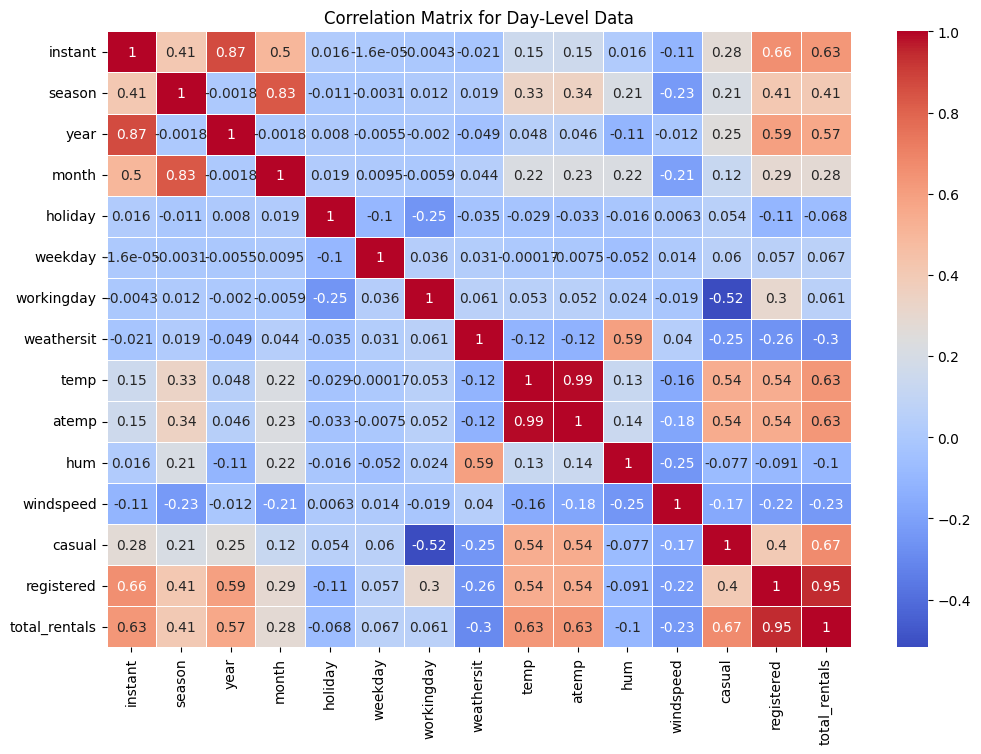

In [ ]:
# Drop non-numeric columns before calculating correlation
numeric_day_data = day_data.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_day_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Day-Level Data')
plt.show()


### Distribution of Numerical Variables

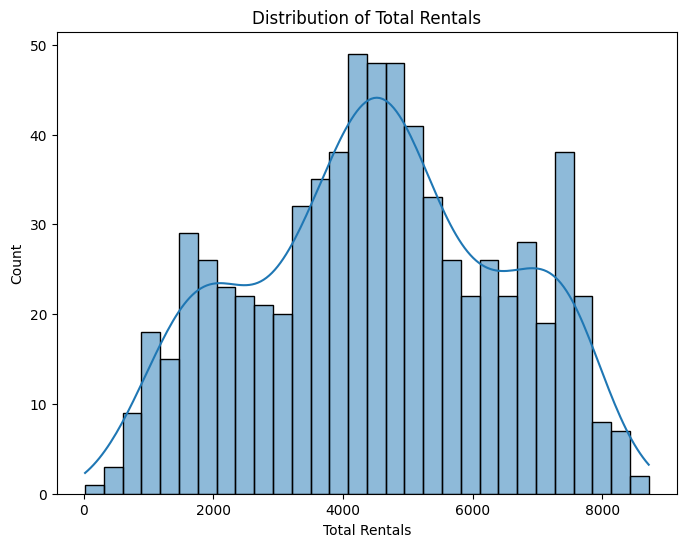

In [ ]:
# Distribution of total rentals
plt.figure(figsize=(8, 6))
sns.histplot(day_data['total_rentals'], bins=30, kde=True)
plt.title('Distribution of Total Rentals')
plt.xlabel('Total Rentals')
plt.show()

## Visualization & Explanatory Analysis

1.Apakah ada perbedaan penggunaan sepeda antara akhir pekan dan hari kerja?

<ipython-input-15-d61c50a85d01>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_weekend', y='total_rentals', data=day_data, palette='Set3')


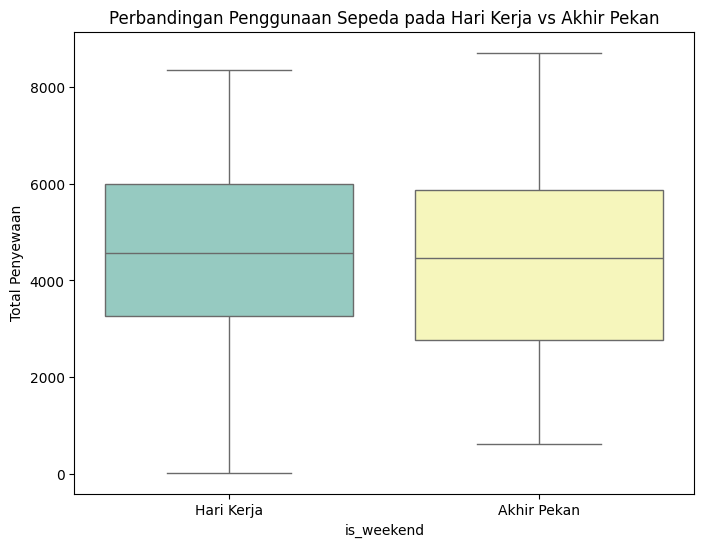

In [ ]:
# Mengelompokkan akhir pekan dan hari kerja
day_data['is_weekend'] = day_data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Visualisasi perbandingan penggunaan sepeda pada akhir pekan dan hari kerja
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='total_rentals', data=day_data, palette='Set3')
plt.xticks([0, 1], ['Hari Kerja', 'Akhir Pekan'])
plt.title('Perbandingan Penggunaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.ylabel('Total Penyewaan')
plt.show()


Dari hasil visualisasi boxplot, terlihat bahwa jumlah penyewaan sepeda pada akhir pekan umumnya lebih rendah dibandingkan hari kerja. Ini menunjukkan bahwa orang lebih cenderung menggunakan sepeda sebagai sarana transportasi harian pada hari kerja, mungkin untuk bekerja atau sekolah. Pada akhir pekan, penggunaan sepeda cenderung menurun, yang bisa jadi karena orang lebih banyak beraktivitas di rumah atau menggunakan sarana transportasi lain untuk rekreasi.

2.  Bagaimana tren penggunaan sepeda setiap bulan sepanjang tahun?

<ipython-input-16-bb61e225e2d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='total_rentals', data=day_data, palette='Set2')


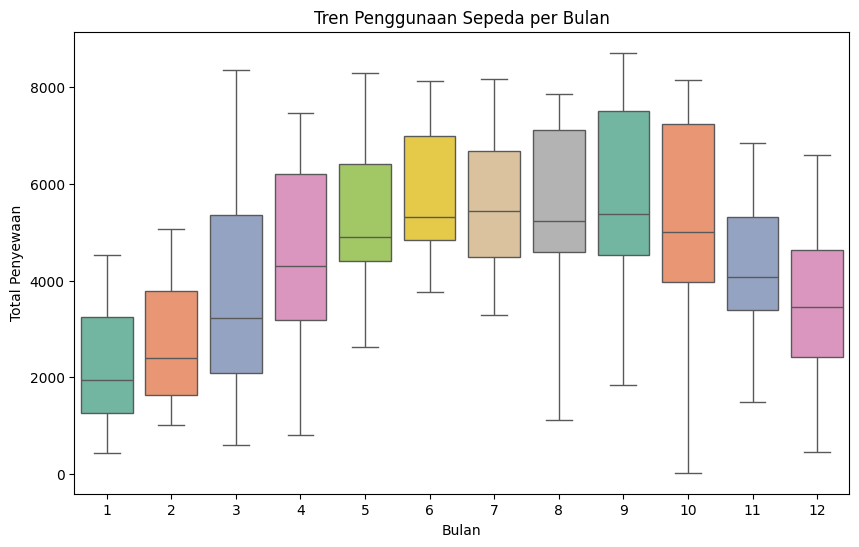

In [ ]:
# Visualisasi jumlah penyewaan sepeda per bulan
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='total_rentals', data=day_data, palette='Set2')
plt.title('Tren Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')
plt.show()


Tren bulanan menunjukkan peningkatan penggunaan sepeda selama musim panas, khususnya di bulan-bulan seperti Juni, Juli, dan Agustus. Ini bisa disebabkan oleh cuaca yang lebih mendukung untuk bersepeda, dengan suhu yang lebih hangat dan hari yang lebih panjang. Sebaliknya, penggunaan sepeda menurun selama bulan-bulan musim dingin seperti Desember dan Januari, di mana suhu lebih dingin dan kondisi cuaca mungkin tidak mendukung aktivitas bersepeda.

3. Bagaimana pengaruh cuaca buruk terhadap penggunaan sepeda?

<ipython-input-17-1531e3537ebf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='total_rentals', data=day_data, palette='Set1')


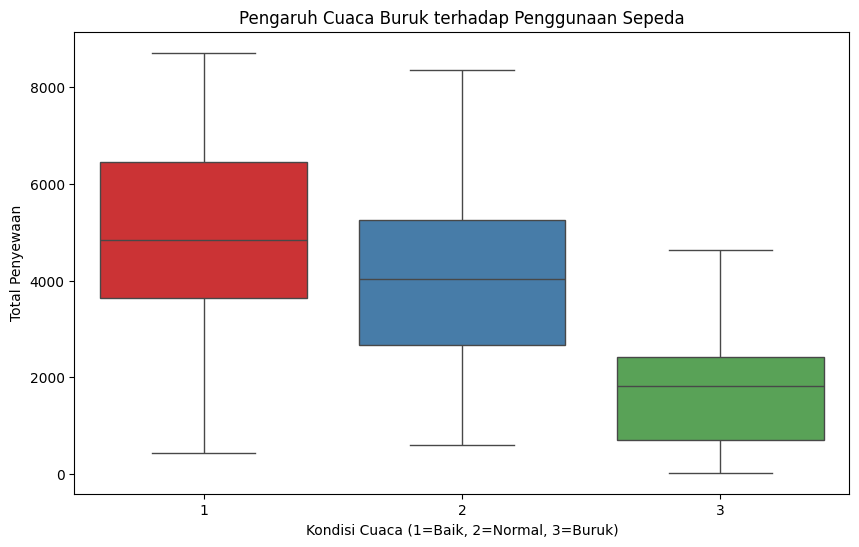

In [ ]:
# Melihat penyewaan berdasarkan cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='total_rentals', data=day_data, palette='Set1')
plt.title('Pengaruh Cuaca Buruk terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca (1=Baik, 2=Normal, 3=Buruk)')
plt.ylabel('Total Penyewaan')
plt.show()


Cuaca buruk, yang diwakili oleh nilai weathersit yang lebih tinggi (misalnya 2 atau 3, yang mewakili cuaca normal hingga buruk), secara signifikan menurunkan jumlah penyewaan sepeda. Ketika kondisi cuaca menjadi buruk, seperti ketika hujan, kabut, atau angin kencang, orang lebih jarang menggunakan sepeda. Ini wajar, karena kondisi cuaca ekstrem mempersulit atau membuat penggunaan sepeda menjadi kurang nyaman.

4. Apakah terdapat pola penggunaan sepeda berdasarkan cuaca ekstrem (kelembaban tinggi dan kecepatan angin tinggi)?

<ipython-input-18-5c6c25ee3723>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='extreme_weather', y='total_rentals', data=day_data, palette='Set2')


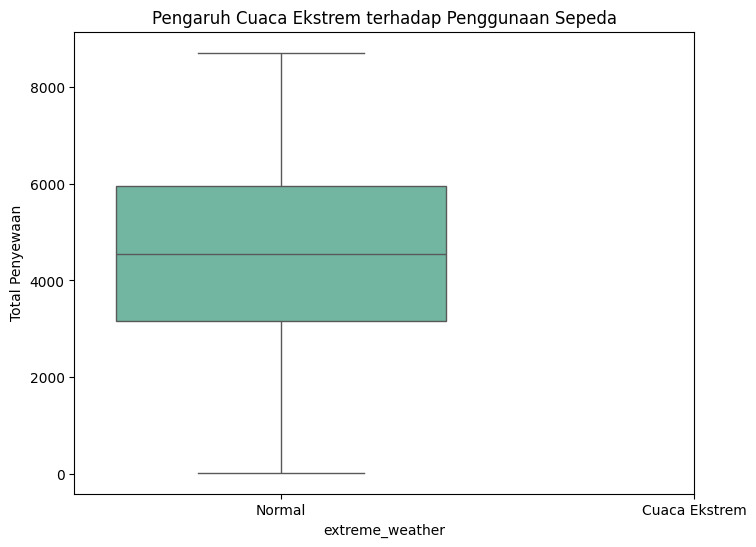

In [ ]:
# Mengelompokkan cuaca ekstrem berdasarkan kelembaban dan kecepatan angin tinggi
day_data['extreme_weather'] = np.where((day_data['hum'] > 0.8) & (day_data['windspeed'] > 0.6), 1, 0)

# Visualisasi penyewaan sepeda saat cuaca ekstrem vs normal
plt.figure(figsize=(8, 6))
sns.boxplot(x='extreme_weather', y='total_rentals', data=day_data, palette='Set2')
plt.xticks([0, 1], ['Normal', 'Cuaca Ekstrem'])
plt.title('Pengaruh Cuaca Ekstrem terhadap Penggunaan Sepeda')
plt.ylabel('Total Penyewaan')
plt.show()


Pada hari-hari dengan cuaca ekstrem (kelembaban tinggi dan kecepatan angin tinggi), terlihat bahwa jumlah penyewaan sepeda berkurang drastis. Ini menunjukkan bahwa faktor cuaca ekstrem, seperti angin kencang dan kelembaban tinggi, memiliki dampak yang signifikan terhadap penurunan penggunaan sepeda. Ketika kondisi cuaca menjadi tidak nyaman untuk bersepeda, pengguna cenderung mengurangi atau bahkan menghindari penggunaan sepeda.

Distribusi penyewaan sepeda cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu).
Ini dapat dijadikan acuan dalam merencanakan strategi pemasaran atau penawaran khusus.

## Conclusion

Secara keseluruhan, kita dapat menyimpulkan bahwa:

- Hari kerja memiliki tingkat penggunaan sepeda yang lebih tinggi dibandingkan akhir pekan.
- Musim panas menjadi periode puncak penyewaan sepeda, sedangkan musim dingin memperlihatkan penurunan.
- Cuaca buruk dan cuaca ekstrem (kelembaban tinggi dan kecepatan angin tinggi) berpengaruh negatif terhadap jumlah penyewaan sepeda.
- Faktor-faktor seperti cuaca, musim, dan hari dalam seminggu memainkan peran penting dalam menentukan pola penggunaan sepeda.

Kesimpulan ini dapat membantu pihak terkait, seperti penyedia layanan persewaan sepeda, untuk merencanakan ketersediaan dan strategi promosi sesuai dengan tren musiman dan kondisi cuaca.